In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [17]:
colnames = ['rmse']

# cambiare i percorsi con i propri dati
data_Prophet = pd.read_csv('Data/Prophet/RMSE_error_data_4_Prophet_with_STL_Decomposition_12.csv', names=colnames, header=None)

data_MLP = pd.read_csv('Data/MLP/RMSE_error_data_4_MLP_with_STL_Decomposition_in12.csv', names=colnames, header=None)

data_LSTM = pd.read_csv('Data/LSTM/RMSE_error_data_4_LSTM_with_STL_Decomposition_12.csv', names=colnames, header=None)

data_CNN = pd.read_csv('Data/CNN/RMSE_error_data_4_CNN_with_STL_Decomposition_in12.csv', names=colnames, header=None)

data_ARIMA = pd.read_csv('Data/ARIMA/RMSE_error_data_4_ARIMA_MultistepForcast_12_V2.csv', names=colnames, header=None)

data_ETS = pd.read_csv('Data/ETS/RMSE_error_data_4_ETS_MultistepForcast_12.csv', names=colnames, header=None)

data_AR = pd.read_csv('Data/AR/RMSE_error_data_4_Autoregression_12_StepForecast.csv', names=colnames, header=None)

data_Naive = pd.read_csv('Data/Naive/RMSE_error_data_4_Naive_DayHourAveragePrediction.csv', names=colnames, header=None)

In [21]:
data_ARIMA = data_ARIMA.dropna()
data_ETS = data_ETS.dropna()

In [32]:
naive_rmse = []
for i, row in data_Naive.iterrows():
    rmse_cell = row['rmse']
    rmse = rmse_cell.split(':')[1][:4]
    naive_rmse.append(float(rmse))

mlp_rmse = []
for i, row in data_MLP.iterrows():
    rmse_cell = row['rmse']
    rmse = rmse_cell.split(':')[1][:4]
    mlp_rmse.append(float(rmse))

cnn_rmse = []
for i, row in data_CNN.iterrows():
    rmse_cell = row['rmse']
    rmse = rmse_cell.split(':')[1][:4]
    cnn_rmse.append(float(rmse))
    
lstm_rmse = []
for i, row in data_LSTM.iterrows():
    rmse_cell = row['rmse']
    rmse = rmse_cell.split(':')[1][:4]
    lstm_rmse.append(float(rmse))

arima_rmse = []
for i, row in data_ARIMA.iterrows():
    rmse_cell = row['rmse']
    rmse = rmse_cell.split(':')[1][:4]
    arima_rmse.append(float(rmse))

ets_rmse = []
for i, row in data_ETS.iterrows():
    rmse_cell = row['rmse']
    rmse = rmse_cell.split(':')[1][:4]
    ets_rmse.append(float(rmse))    
    
prophet_rmse = []
for i, row in data_Prophet.iterrows():
    rmse_cell = row['rmse']
    rmse = rmse_cell.split(':')[1][:4]
    prophet_rmse.append(float(rmse))  
    
ar_rmse = []
for i, row in data_AR.iterrows():
    rmse_cell = row['rmse']
    rmse = rmse_cell.split(':')[1][:4]
    ar_rmse.append(float(rmse))     

In [40]:
import math
arima_rmse = [0 if math.isnan(x) else x for x in arima_rmse]
ets_rmse = [0 if math.isnan(x) else x for x in ets_rmse]

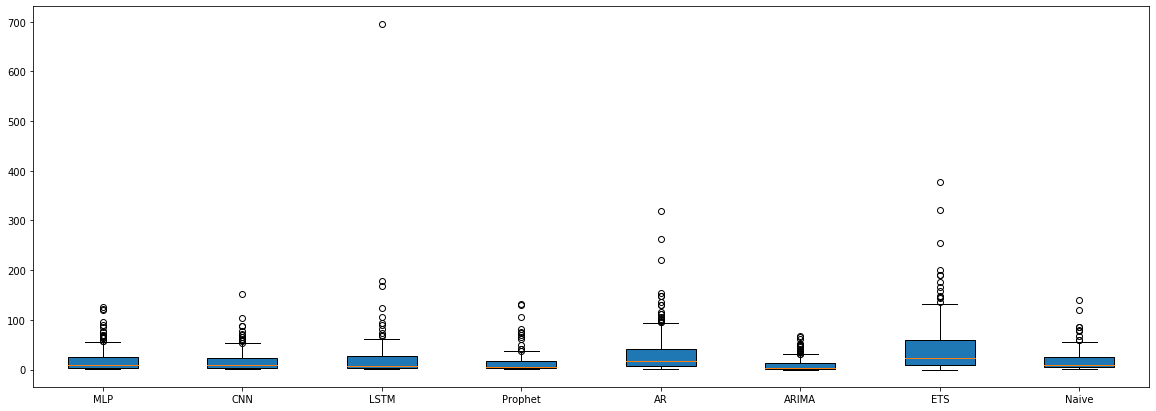

In [41]:
data_to_plot = [mlp_rmse, cnn_rmse, lstm_rmse, prophet_rmse, ar_rmse, arima_rmse, ets_rmse, naive_rmse]

# Create a figure instance
fig = plt.figure(1, figsize=(20, 7))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True)
ax.set_xticklabels(['MLP', 'CNN', 'LSTM', 'Prophet', 'AR', 'ARIMA', 'ETS', 'Naive'])

# Save the figure
fig.savefig('ConfrontoMetodiRMSE.jpeg', bbox_inches='tight')